<a href="https://colab.research.google.com/github/Keerys/MVP---Machine-Learning/blob/main/MVP_TESTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.ensemble import ExtraTreesClassifier #Importancia de atributos extra tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/Keerys/MVP---Machine-Learning/main/neo_v2%20(2).csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset

Carga do Dataset

In [2]:
#url = 'https://raw.githubusercontent.com/Keerys/MVP---Machine-Learning/main/loan_approval_dataset.csv'

url = 'https://raw.githubusercontent.com/Keerys/MVP---Machine-Learning/main/loan_approval_dataset%20-%20Balanceado.csv'

dataset = pd.read_csv(url)

dataset



,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
1,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
2,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
3,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
4,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
3222,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
3223,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
3224,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


PREPARAÇÃO DOS DADOS

In [4]:
# Preparação dos dados

test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em bases de treino e teste (holdout)
array = dataset.values

X = array[:,[1,4,5,6,7,8,9,10,11]] # atributos      PENSAR EM EXCLUIR COLUNAS 'EDUCATION' E 'SELF-EMPLOYED´ PARA TRABALHAR SOMENTE COM NUMEROS
y = array[:,12] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação (POIS CONJUNTO DE DADOS É DESBALANCEADO)



Seleção de atributos  USAR ELIMINAÇÃO RECURSIVA DOS ATRIBUTOS!!!!


In [12]:
# SelectKBest (RESULTADO RUIM)

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[[1,4,5,6,7,8,9,10,11]])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[[1,4,5,6,7,8,9,10,11]]))


Número original de atributos: 9

Número reduzido de atributos: 4

Atributos Originais: Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

Scores dos Atributos Originais: [3.468e-01 1.869e-01 1.557e+00 3.538e+01 5.517e+03 9.256e-02 1.553e+00
 6.158e-01 7.789e-03]

Atributos Selecionados: [' loan_amount' ' loan_term' ' cibil_score' ' commercial_assets_value']


In [10]:
# Eliminação Recursiva de Atributos MELHOR DESEMPENHO ESSA OPÇÃO USAR ELE NO PROJETO

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[[1,4,5,6,7,8,9,10,11]])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[[1,4,5,6,7,8,9,10,11]]))

Atributos Originais: Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')

Atributos Selecionados: [False  True  True False False False  True False  True]

Ranking de atributos: [6 1 1 5 3 4 1 2 1]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: [' income_annum' ' loan_amount' ' commercial_assets_value'
 ' bank_asset_value']


In [14]:
# Importância de Atributos com ExtraTrees (RESULTADO RUIM)

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[[1,4,5,6,7,8,9,10,11]])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
       ' cibil_score', ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value'],
      dtype='object')
[0.023 0.029 0.035 0.056 0.742 0.029 0.028 0.029 0.028]


MODELAGEM E TREINAMENTO

Criação e Avaliação do Modelo: linha base

LR: 0.554651 (0.057318)
KNN: 0.521318 (0.044167)
CART: 0.973256 (0.010174)
NB: 0.884109 (0.020905)
SVM: 0.532558 (0.030725)
Bagging: 0.974031 (0.012977)
RF: 0.972481 (0.012189)
ET: 0.959690 (0.014931)
Ada: 0.969767 (0.012595)
GB: 0.972093 (0.013064)
Voting: 0.632171 (0.063534)


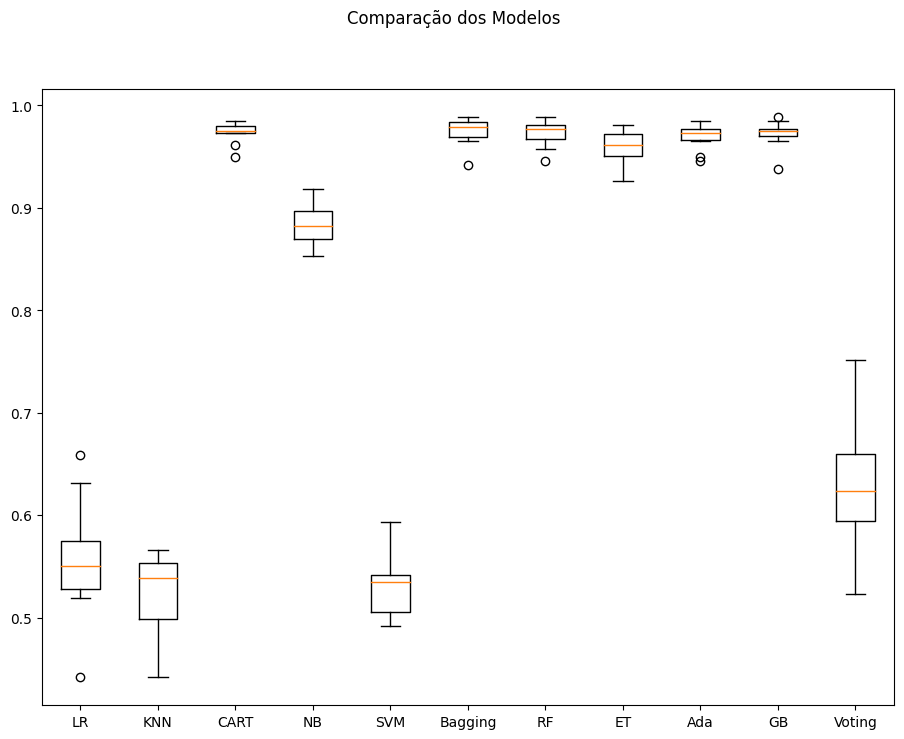

In [15]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))
model4 = LogisticRegression()
bases.append(('LR', model4))
model5 = KNeighborsClassifier()
bases.append(('KNN', model5))



# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
plt.rcParams.update({'font.size': 10}) # add depois
fig = plt.figure(figsize=(11,8))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Criação e Avaliação do Modelo: Padronizado e Normalizado

LR-orig: 0.555 (0.057)
KNN-orig: 0.521 (0.044)
CART-orig: 0.973 (0.010)
NB-orig: 0.884 (0.021)
SVM-orig: 0.533 (0.031)
Bag-orig: 0.974 (0.013)
RF-orig: 0.972 (0.012)
ET-orig: 0.960 (0.015)
Ada-orig: 0.970 (0.013)
GB-orig: 0.972 (0.013)
Vot-orig: 0.632 (0.064)
LR-padr: 0.926 (0.013)
KNN-padr: 0.910 (0.014)
CART-padr: 0.975 (0.008)
NB-padr: 0.949 (0.012)
SVM-padr: 0.941 (0.017)
Bag-padr: 0.974 (0.012)
RF-padr: 0.970 (0.010)
ET-padr: 0.962 (0.010)
Ada-padr: 0.970 (0.013)
GB-padr: 0.972 (0.013)
Vot-padr: 0.946 (0.010)
LR-norm: 0.927 (0.014)
KNN-norm: 0.910 (0.016)
CART-norm: 0.975 (0.008)
NB-norm: 0.949 (0.012)
SVM-norm: 0.940 (0.014)
Bag-norm: 0.974 (0.012)
RF-norm: 0.970 (0.012)
ET-norm: 0.960 (0.012)
Ada-norm: 0.970 (0.013)
GB-norm: 0.972 (0.013)
Vot-norm: 0.946 (0.008)


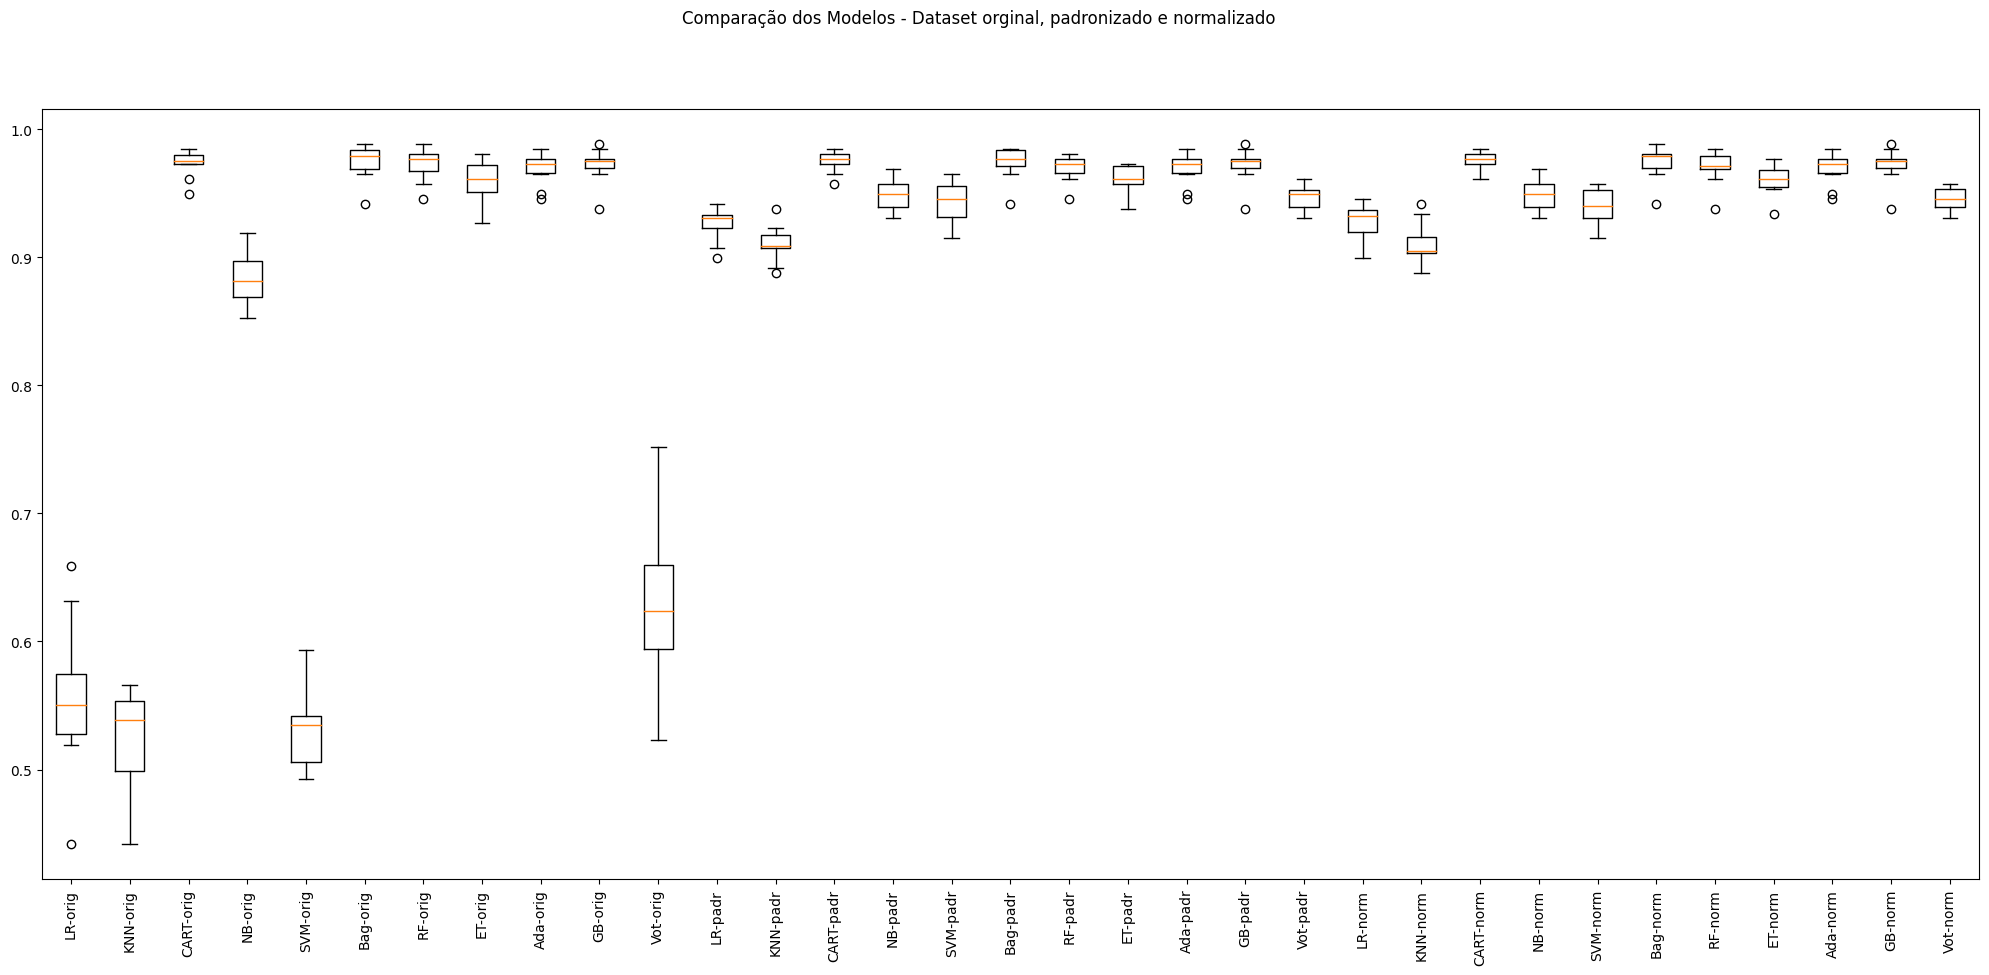

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,10))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [ ]:
# Tuning do CART (FALTA FAZER!!!!!!!!)

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))

param_grid = {
    'bag__modelo': [DecisionTreeClassifier()],
    'bag__membros': [5],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

ValueError: Invalid parameter 'bag' for estimator Pipeline(steps=[('Bag',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                   n_estimators=100))]). Valid parameters are: ['memory', 'steps', 'verbose'].

AVALIAÇÃO DO RESULTADO - Finalização do Modelo


In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = DecisionTreeClassifier()
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.9814241486068112


In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

DecisionTreeClassifier()

SIMULANDO EM NOVOS DADOS

In [ ]:
# Novos dados - não sabemos a classe!
#data = {'preg':  [1, 9, 5],
#        'plas': [90, 100, 110],
 #       'pres': [50, 60, 50],
#        'skin': [30, 30, 30],
#        'test': [100, 100, 100],
 #       'mass': [20.0, 30.0, 40.0],
 #       'pedi': [1.0, 2.0, 1.0],
 #       'age': [15, 40, 40],
 #       }

data = {'no_of_dependents': [3, 1, 2],
        'income_annum': [580000, 978000, 798540],
        'loan_amount': [650000, 850000, 80000],
        'loan_term': [13, 28, 10],
        'cibil_score': [512, 769, 300],
        'residential_assets_value': [1240000, 650000, 250300],
        'commercial_assets_value': [1450365, 250000, 765421],
        'luxury_assets_value': [2120325, 450123, 875240],
        'bank_asset_value': [900000, 754888, 500000]
        }

atributos = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,:]

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)



[[ 0.28147974 -1.62041079 -1.62643056  0.32910623 -0.31623996 -0.96895539
  -0.81391011 -1.44532477 -1.27217166]
 [-0.89247456 -1.47749534 -1.60398437  2.98246351  1.17290256 -1.05944655
  -1.08737229 -1.63013833 -1.3170885 ]
 [-0.30549741 -1.54193656 -1.69040221 -0.20156523 -1.54463767 -1.12075048
  -0.96995121 -1.58309768 -1.39598455]]


In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[' Rejected' ' Approved' ' Rejected']
